## Regresion Logistica

### Juan Manuel Vargas Liz

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [1]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones

# librerías de para implementar modelo Kmeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#Librería para evitar la advertencia de que el modelo de KMeans tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('heart_cleveland_upload.csv')

In [3]:
# Realizamos lectura de los Datos para el análisis exploratorio

Datos.head(40)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [4]:
# Descripción de los datos
Datos.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

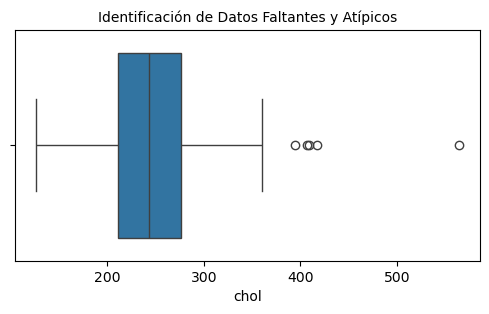

In [14]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['chol'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [16]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en age: ",Datos['age'].isin([0]).sum())
print("Cantidad de Registros con cero en exang: ",Datos['exang'].isin([0]).sum())
print("Cantidad de Registros con cero en Data slope: ",Datos['slope'].isin([0]).sum())
print("Cantidad de Registros con cero en Data condition: ",Datos['condition'].isin([0]).sum())

Cantidad de Registros con cero en age:  0
Cantidad de Registros con cero en exang:  200
Cantidad de Registros con cero en Data slope:  139
Cantidad de Registros con cero en Data condition:  160


In [17]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna.

Datos['condition']=Datos['condition'].replace(0,Datos['condition'].mean())

Text(0.5, 1.0, 'Identificación de Datos Atípicos')

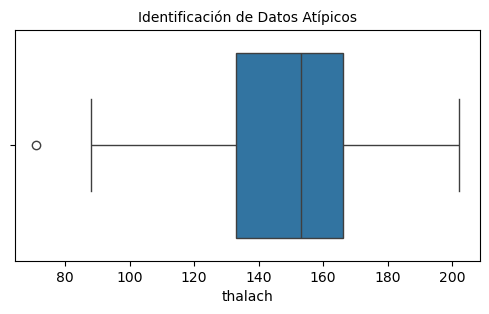

In [24]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['thalach'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [25]:
#Conteo de Datos Atípicos

nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((Datos['thalach']<nivel_minimo)|(Datos['thalach']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 289


In [26]:
# Filtra Datos Atípicos

Datos=Datos[(Datos['thalach']<nivel_maximo)&(Datos['thalach']>nivel_minimo)]

In [27]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 91 to 252
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        8 non-null      int64  
 1   sex        8 non-null      int64  
 2   cp         8 non-null      int64  
 3   trestbps   8 non-null      int64  
 4   chol       8 non-null      int64  
 5   fbs        8 non-null      int64  
 6   restecg    8 non-null      int64  
 7   thalach    8 non-null      int64  
 8   exang      8 non-null      int64  
 9   oldpeak    8 non-null      float64
 10  slope      8 non-null      int64  
 11  ca         8 non-null      int64  
 12  thal       8 non-null      int64  
 13  condition  8 non-null      float64
dtypes: float64(2), int64(12)
memory usage: 960.0 bytes


## 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

In [29]:
# Filtrar columnas del modelo 

Datos = Datos[["sex","age","condition"]]

In [30]:
Datos.head(10)

,sex,age,condition
91,0,62,1.000000
95,0,60,0.461279
164,1,67,1.000000
174,1,64,1.000000
187,1,62,1.000000
210,1,59,1.000000
226,1,57,1.000000
252,1,53,1.000000


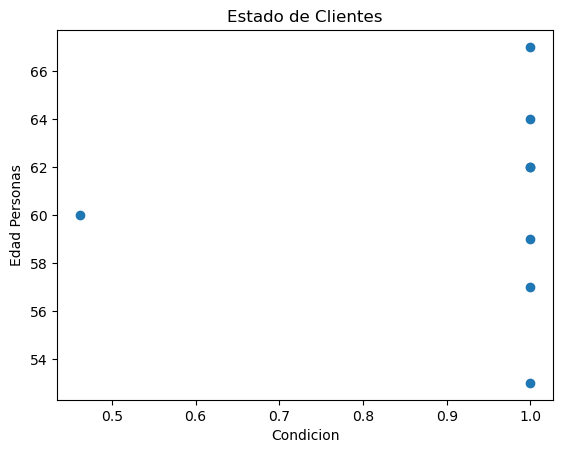

In [31]:
# Grafica antes del agrupamiento

plt.scatter(Datos['condition'], Datos['age'])
plt.xlabel('Condicion')
plt.ylabel('Edad Personas')
plt.title('Estado de Clientes')
plt.show()

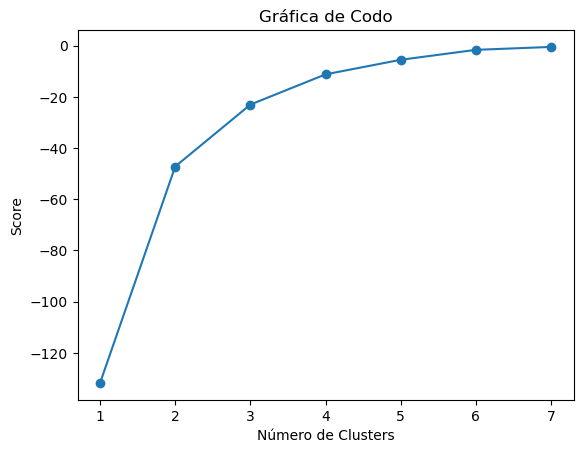

In [32]:
#Se realiza gráfica de codo para identificar valor de K

Nc = range(1, 8)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(Datos).score(Datos) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Gráfica de Codo')
plt.show()

In [33]:
# Generación del modelo de Agrupamiento del modelo con K=5 (Es decir haremos 5 grupos de agrupamiento) 

Modelo = KMeans(n_clusters=5, random_state=0)
Modelo.fit(Datos)
 

KMeans(n_clusters=5, random_state=0)

In [34]:
#Se agrega la columna Grupo a la BD para identificar el numero de grupo del agrupamiento

Modelo.labels_
Datos["Grupo"] = Modelo.labels_ 
print (Datos)

     sex  age  condition  Grupo
91     0   62   1.000000      0
95     0   60   0.461279      3
164    1   67   1.000000      2
174    1   64   1.000000      0
187    1   62   1.000000      0
210    1   59   1.000000      3
226    1   57   1.000000      4
252    1   53   1.000000      1


## 5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc

In [35]:
# Desempeño del modelo con el Coeficiente de Silhouette el Índice de Calinski-Harabasz y el índice de Davies Bouldin Score

# Preparación de la metrica de la columna Grupo
Observaciones = len(Datos)
X = Datos.drop('Grupo', axis=1)
clusters = Datos['Grupo']

# Se calculan las métricas
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Se crea una tabla para mostrar los valores de las métricas
table_data = [
    ["Numero de Observaciones", Observaciones],
    ["Coeficiente Silhouette", sil_score],
    ["Indice Calinski Harabasz", calinski_score],
    ["Indice Davies Bouldin", davies_score]
]

# Imprime la tabla
from tabulate import tabulate
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+--------------------------+---------------------+
|          Metric          |        Value        |
+--------------------------+---------------------+
| Numero de Observaciones  |          8          |
|  Coeficiente Silhouette  | 0.22758453192872335 |
| Indice Calinski Harabasz | 21.314688866162573  |
|  Indice Davies Bouldin   | 0.3526145473222849  |
+--------------------------+---------------------+
